# Scoring functions for tracking

import standard libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import user code

In [2]:
import tracking
import transform

using simple DBSCAN clustering to have example tracks to work on

In [3]:
tracker = tracking.ClusterDBSCAN()

In [4]:
df = pd.read_csv("/Users/yetkin/ramp/trackML/generate/hits_train_00.csv")

In [5]:
y_df = df[['particle']]
X_df = df.drop(['hit','particle'], axis=1)

temporarily using same sample for training and testing

In [6]:
X_train_df = X_df.copy()
y_train_df = y_df.copy()
X_test_df = X_df.copy()
y_test_df = y_df.copy()

placeholder for training the ML algorithm

(in this case, just optimize clustering parameters)

In [7]:
tracker.fit(X_train_df.values, y_train_df.values)

find the tracks in the test sample

In [8]:
y_predicted = tracker.predict(X_test_df.values)

every hit is assigned to a single cluster, where the labels representing the clusters do not necessarily correspond to the particle labels in the training sample

In [9]:
y_predicted.size

985

In [10]:
y_test = y_test_df.values[:,0]

In [11]:
y_pred = y_predicted

In [12]:
len(np.unique(y_pred))

49

In [13]:
y_test.size

985

In [14]:
particle=8
true_hits = y_test[y_test[:] == particle]

In [15]:
true_hits

array([8, 8, 8, 8, 8, 8, 8, 8, 8, 8])

In [16]:
found_hits = y_pred[y_test[:] == particle]

In [17]:
found_hits

array([ 8,  9, 10, 11, -1, -1, -1, -1, -1, -1])

In [18]:
np.unique(y_test)

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])

In [19]:
nsubcluster=len(np.unique(found_hits[found_hits[:] >= 0]))

In [20]:
nsubcluster

4

In [21]:
np.bincount(found_hits[found_hits[:] >= 0])

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1])

In [22]:
found_hits[found_hits[:] >= 0]

array([ 8,  9, 10, 11])

In [23]:
np.bincount(found_hits[found_hits[:] >= 0])

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1])

In [24]:
maxcluster = np.argmax(np.bincount(found_hits[found_hits[:] >= 0]))

In [25]:
maxcluster

8

In [26]:
cmap = ['k','b','y','g','r']

In [27]:
foundtrack = 1
X_train_df.values[y_test[:] == foundtrack,0]

array([  913.8710925 ,  1883.32087365,  2893.2277171 ,  3927.57143491,
        4968.84961433,  5997.26506749,  6989.50859565,  7916.776184  ,
        8741.22449647,  9408.85273922])

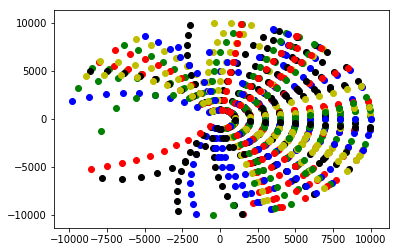

In [28]:
for foundtrack in np.unique(y_test):
    if foundtrack >= 0:
        plt.scatter(X_train_df.values[y_test[:] == foundtrack,0],X_train_df.values[y_test[:] == foundtrack,1],color=cmap[foundtrack % 5])
plt.show()

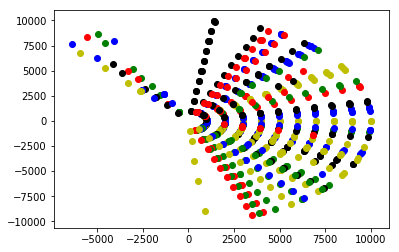

In [29]:
for foundtrack in np.unique(y_pred):
    if foundtrack >= 0:
        plt.scatter(X_train_df.values[y_pred[:] == foundtrack,0],X_train_df.values[y_pred[:] == foundtrack,1],color=cmap[foundtrack % 5])
plt.show()

In [30]:
hits_polar = transform.polar(X_train_df.values)
plt.xlim([-np.pi,np.pi])
plt.ylim([-0.,0.0011])

(-0.0, 0.0011)

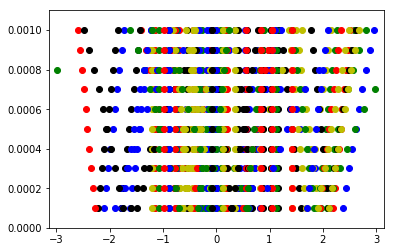

In [31]:
for foundtrack in np.unique(y_test):
    if foundtrack >= 0:
        plt.scatter(hits_polar[y_test[:] == foundtrack,1],hits_polar[y_test[:] == foundtrack,0],color=cmap[foundtrack % 5])
plt.show()

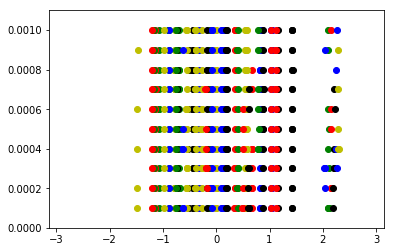

In [32]:
plt.xlim([-np.pi,np.pi])
plt.ylim([-0.,0.0011])
for foundtrack in np.unique(y_pred):
    if foundtrack >= 0:
        plt.scatter(hits_polar[y_pred[:] == foundtrack,1],hits_polar[y_pred[:] == foundtrack,0],color=cmap[foundtrack % 5])
plt.show()

# Let's score the tracks now

In [33]:
import score_cluster as sc

In [34]:
def analyze_particle(particle = 5):

    plt.scatter(X_train_df.values[y_test[:] == particle,0],X_train_df.values[y_test[:] == particle,1],color='k')

    found_hits = y_pred[y_test[:] == particle]
    #        print "found hits : ", found_hits

    nsubcluster=len(np.unique(found_hits[found_hits[:] >= 0]))
    #        print "found clusters : ", nsubcluster

    if(nsubcluster > 0):
            # fix for degeneracy!
            foundtrack = np.argmax(np.bincount(found_hits[found_hits[:] >= 0]))
            plt.scatter(X_train_df.values[y_pred[:] == foundtrack,0],X_train_df.values[y_pred[:] == foundtrack,1],color='r')


    plt.show()
    return sc.evaluate(y_test,y_pred,particle)

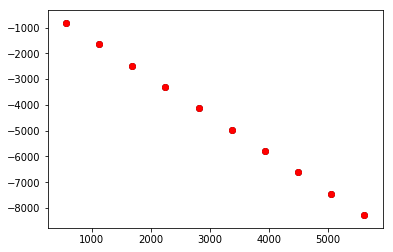

particle :  94
true hits :  [94 94 94 94 94 94 94 94 94 94]
found hits :  [47 47 47 47 47 47 47 47 47 47]
found clusters :  1
efficiency :  1
fake :  0


(1, 0)

In [65]:
analyze_particle(94)

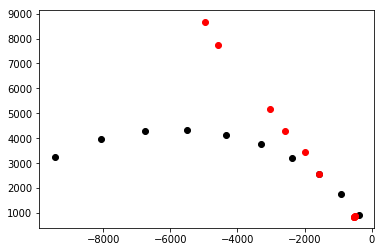

particle :  38
true hits :  [38 38 38 38 38 38 38 38 38 38]
found hits :  [-1 36  8 10 37 -1 -1 -1 -1 -1]
found clusters :  4
efficiency :  0
fake :  1


(0, 1)

In [44]:
analyze_particle(38)

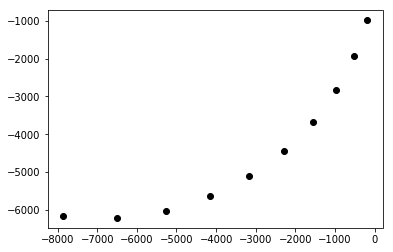

particle :  85
true hits :  [85 85 85 85 85 85 85 85 85 85]
found hits :  [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
found clusters :  0


(0.0, 0.0)

In [73]:
analyze_particle(85)

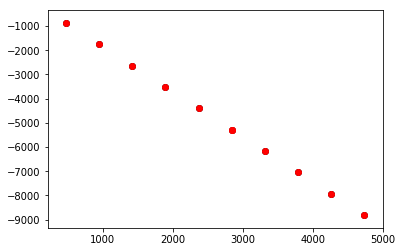

particle :  83
true hits :  [83 83 83 83 83 83 83 83 83 83]
found hits :  [13 13 13 13 13 13 13 13 13 13]
found clusters :  1
efficiency :  1
fake :  0


(1, 0)

In [75]:
analyze_particle(83)

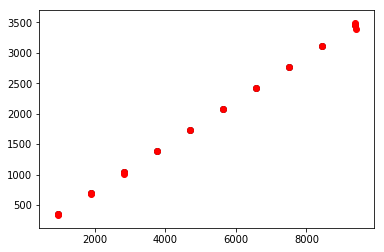

particle :  82
true hits :  [82 82 82 82 82 82 82 82 82 82]
found hits :  [4 4 4 4 4 4 4 4 4 4]
found clusters :  1
efficiency :  1
fake :  0


(1, 0)

In [76]:
analyze_particle(82)

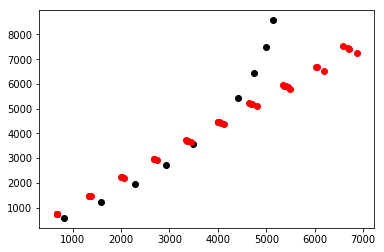

particle :  15
true hits :  [15 15 15 15 15 15 15 15 15 15]
found hits :  [45 19 -1 -1 23 16 20 -1 -1 21]
found clusters :  6
efficiency :  0
fake :  3


(0, 3)

In [49]:
analyze_particle(15)

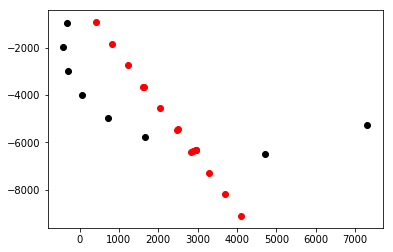

particle :  66
true hits :  [66 66 66 66 66 66 66 66 66]
found hits :  [-1 -1 -1 -1 -1 -1 14 -1 41]
found clusters :  2
efficiency :  0
fake :  1


(0, 1)

In [93]:
analyze_particle(66)

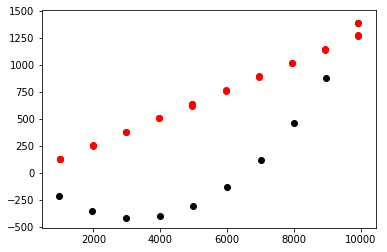

particle :  23
true hits :  [23 23 23 23 23 23 23 23 23 23]
found hits :  [-1 34 -1 -1 -1 -1 -1 -1 26  6]
found clusters :  3
efficiency :  0
fake :  2


(0, 2)

In [51]:
analyze_particle(23)

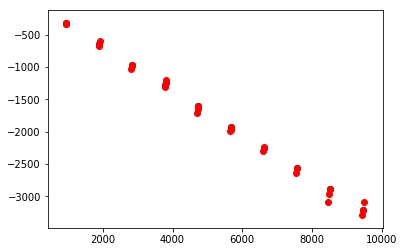

particle :  26
true hits :  [26 26 26 26 26 26 26 26 26 26]
found hits :  [1 1 1 1 1 1 1 1 1 1]
found clusters :  1
efficiency :  1
fake :  2


(1, 2)

In [52]:
analyze_particle(26)

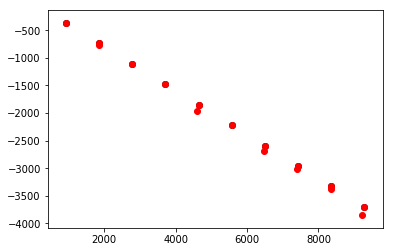

particle :  12
true hits :  [12 12 12 12 12 12 12 12 12 12]
found hits :  [7 7 7 7 7 7 7 7 7 7]
found clusters :  1
efficiency :  1
fake :  0


(1, 0)

In [47]:
analyze_particle(12)

In [94]:
import numpy as np
# import pandas as pd



def evaluate(y_test, y_pred, particle = -1):

    eff_total = 0.;
    fake_total = 0.;

    # evaluate hit efficiency
    listtoscore = [particle]
    if(particle < 0) : listtoscore = np.unique(y_test)
    
    maxcluster = np.full(shape=len(y_test)+1,fill_value=-1)

    for particle in listtoscore:
        
        eff = 0.;
        fake = 0.;

        print "particle : ", particle
        true_hits = y_test[y_test[:] == particle]
        found_hits = y_pred[y_test[:] == particle]

        nsubcluster=len(np.unique(found_hits[found_hits[:] >= 0]))

        if(particle >= 0):
            print "true hits : ", true_hits
            print "found hits : ", found_hits
            print "found clusters : ", nsubcluster


        if(nsubcluster > 0):
            # fix for degeneracy!
            maxcluster[particle] = np.argmax(np.bincount(found_hits[found_hits[:] >= 0]))
            eff = len(found_hits[found_hits[:] == maxcluster[particle]])/len(true_hits)

            # evaluate noise
            overlap = (y_pred[:] == maxcluster[particle])
            others = (y_test[:] != particle)
            mask = overlap & others
            noise_hits = y_pred[mask]
            fake = len(noise_hits)/len(true_hits)

            print "efficiency : ", eff
            print "fake : ", fake


        eff_total+=eff
        fake_total+=fake
        
    
    # remove combinatorials
    
    return eff, fake

